In [1]:
# The dataset => https://drive.google.com/file/d/1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3/view
!gdown --id 1ovYiBl-6XFBI9ooATficyPpY6aaZCYEk

Downloading...
From: https://drive.google.com/uc?id=1ovYiBl-6XFBI9ooATficyPpY6aaZCYEk
To: /content/Dataset 1.csv
100% 999k/999k [00:00<00:00, 64.8MB/s]


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv('/content/Dataset 1.csv', engine = 'python')

data

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [7]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['label'].value_counts(0))
data

0    8000
1    2314
Name: label, dtype: int64


,message,label
0,"@curious1966 Not sure, depends on who wants a ...",0
1,I'm Forgot all my problems and depression when...,1
2,"i mean, probably he was way more depressed tha...",1
3,naptime. thanx to all of my followers--i just...,0
4,@MentalStrawbery yeah i didn't change it i was...,0
...,...,...
10309,Ewww! Watery tea! The bag should be brewed for...,0
10310,#depression is to feel like crying every time ...,1
10311,@fawfulfan @AEC_PA @AdreanaInLB @MairinMurphy ...,1
10312,Whether you are excited to graduate or nervous...,1


In [9]:
EPOCH = 10

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [10]:
print(dataTrain['label'].value_counts())

dataTrain

0    4773
1    1417
Name: label, dtype: int64


,message,label
0,"@curious1966 Not sure, depends on who wants a ...",0
1,I'm Forgot all my problems and depression when...,1
2,"i mean, probably he was way more depressed tha...",1
3,naptime. thanx to all of my followers--i just...,0
4,@MentalStrawbery yeah i didn't change it i was...,0
...,...,...
6185,Is anyone joomla-savvyyy? We just need a lil t...,0
6186,Recommend @dcjc Tea Party 2.0 http://tparty2...,0
6187,loving lady G's new song,0
6188,A meta-analysis of 23 peerrun programmes for d...,1


In [11]:
print(dataVal['label'].value_counts())

dataVal

0    1610
1     452
Name: label, dtype: int64


,message,label
6190,Time to take a shower o.o And later iÂ´ll visi...,0
6191,@kierij_ WOW you just have a sample of depress...,1
6192,@theStatus Thanks guys I now have a whole 8 f...,0
6193,Why aren the kardashians the most entertaining...,0
6194,Learning how to forgive myself for the stagnan...,1
...,...,...
8247,"That hard beat of your heart, the endless doub...",1
8248,yes.... yes it is,0
8249,@mrsnasirjones u rdy 2 masterbate hun?? cuz I am,0
8250,just awhile ago me and my dad played wii sport...,0


In [12]:
print(dataTest['label'].value_counts())

dataTest

0    1617
1     445
Name: label, dtype: int64


,message,label
8252,Depression is real,1
8253,@JChidester it's a blessing and a curse. I gl...,0
8254,Onibus com personagem do Tim Burton,0
8255,@hewholovesher hope everything goes good,0
8256,@cM5y_fawkes Your house is famous! didn't you ...,0
...,...,...
10309,Ewww! Watery tea! The bag should be brewed for...,0
10310,#depression is to feel like crying every time ...,1
10311,@fawfulfan @AEC_PA @AdreanaInLB @MairinMurphy ...,1
10312,Whether you are excited to graduate or nervous...,1


In [13]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])

# # To check the outcome
# print(trainX)
# print(trainY)
# print(valX)
# print(valY)
# print(testX)
# print(testY)

# print(trainX.shape)
# print(trainY.shape)
# print(valX.shape)
# print(valY.shape)
# print(testX.shape)
# print(testY.shape)

In [14]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

In [ ]:
# # To check the outcome
# print(trainX)
# print(valX)
# print(testX)
# print('=====')
# print(train_seqs)
# print(val_seqs)
# print(test_seqs)
# print('=====')
# print(train_seqs.shape)
# print(val_seqs.shape)
# print(test_seqs.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2084608   
_________________________________________________________________
lstm (LSTM)                  (None, None, 256)         394240    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 512)         1574912   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          147712    
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 2336      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,203,817
Trainable params: 4,203,817
Non-trainable params: 0
______________________________________________

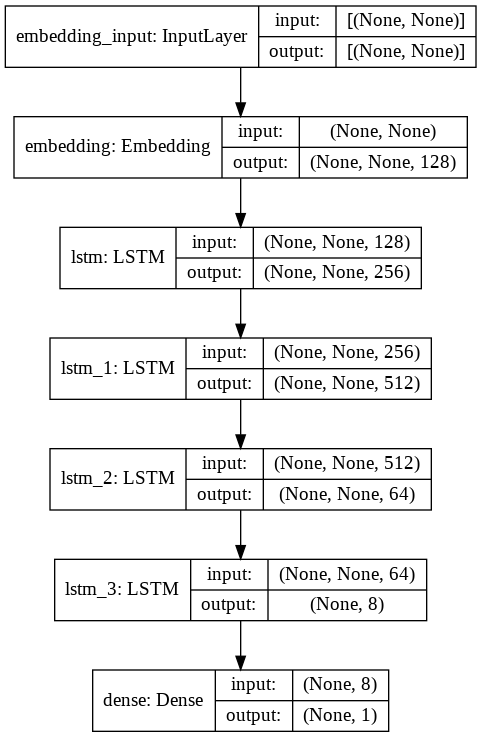

In [15]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.LSTM(256, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(512, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(64, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(8, dropout = 0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
194/194 [==============================] - 34s 114ms/step - loss: 0.5406 - accuracy: 0.7708 - val_loss: 0.5282 - val_accuracy: 0.7808
Epoch 2/10
194/194 [==============================] - 20s 105ms/step - loss: 0.5395 - accuracy: 0.7711 - val_loss: 0.5259 - val_accuracy: 0.7808
Epoch 3/10
194/194 [==============================] - 20s 104ms/step - loss: 0.5445 - accuracy: 0.7664 - val_loss: 0.5261 - val_accuracy: 0.7808
Epoch 4/10
194/194 [==============================] - 20s 104ms/step - loss: 0.5385 - accuracy: 0.7711 - val_loss: 0.5269 - val_accuracy: 0.7808
Epoch 5/10
194/194 [==============================] - 20s 104ms/step - loss: 0.5379 - accuracy: 0.7711 - val_loss: 0.5283 - val_accuracy: 0.7808
Epoch 6/10
194/194 [==============================] - 20s 105ms/step - loss: 0.5054 - accuracy: 0.7774 - val_loss: 0.1904 - val_accuracy: 0.9467
Epoch 7/10
194/194 [==============================] - 20s 104ms/step - loss: 0.0801 - accuracy: 0.9868 - val_loss: 0.0439 - val_ac

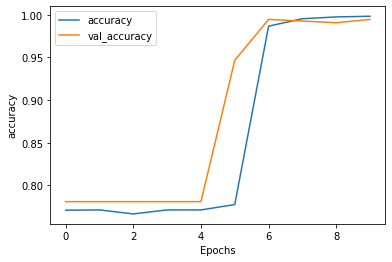

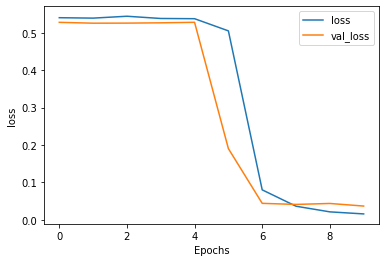


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.770759 	   0.540582 	   0.780795 	   0.528228
       2   0.771082 	   0.539477 	   0.780795 	   0.525934
       3   0.766397 	   0.544504 	   0.780795 	   0.526101
       4   0.771082 	   0.538516 	   0.780795 	   0.526918
       5   0.771082 	   0.537939 	   0.780795 	   0.528314
       6   0.777383 	   0.505356 	   0.946654 	   0.190429
       7   0.986753 	   0.080058 	   0.994665 	   0.043943
       8   0.995477 	   0.036265 	   0.992725 	   0.041092
       9   0.997577 	   0.021176 	   0.990786 	   0.043648
      10   0.998384 	   0.015682 	   0.994665 	   0.036700


In [16]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

### Train Data Performance

194/194 [==============================] - 9s 37ms/step - loss: 0.0130 - accuracy: 0.9989
Train Loss: 0.012956565245985985
Train Accuracy: 0.9988691210746765 (Model Metric)
Train Accuracy: 0.9988691437802908 (sklearn Metric)
Train Precision: 1.0
Train Recall: 0.995059985885674
Train F1-score: 0.9975238769013088


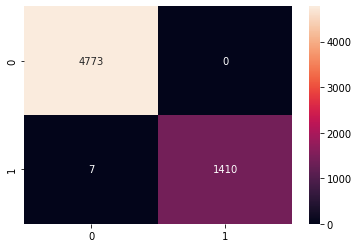

In [17]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

### Val Data Performance

65/65 [==============================] - 2s 32ms/step - loss: 0.0367 - accuracy: 0.9947
Validation Loss: 0.03670007735490799
Validation Accuracy: 0.9946653842926025 (Model Metric)
Validation Accuracy: 0.9946653734238603 (sklearn Metric)
Validation Precision: 0.9977426636568849
Validation Recall: 0.9778761061946902
Validation F1-score: 0.9877094972067039


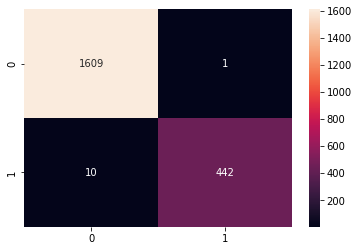

In [18]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

### Test Data Performance

65/65 [==============================] - 4s 34ms/step - loss: 0.0240 - accuracy: 0.9966
Test Loss: 0.023976732045412064
Test Accuracy: 0.9966052174568176 (Model Metric)
Test Accuracy: 0.9966052376333656 (sklearn Metric)
Test Precision: 1.0
Test Recall: 0.9842696629213483
Test F1-score: 0.9920724801812004


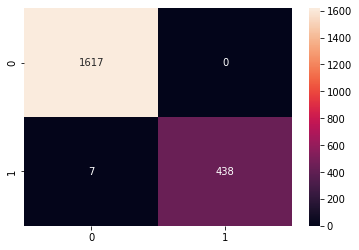

In [19]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')